# Lab 7: Regular Expressions and Strings

In [1]:
require(tidyverse)
require(stringr)

Loading required package: tidyverse
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Regular Expressions

Regular expressions (regex) are a way to describe patterns in text and are used to search for and match certain patterns in strings.

`Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems.` - Jamie Zawinski

For instance, say that you want to find and extract all the email addresses in a document automatically. How might we do that?

### Special characters

Regex takes advantage of several reserved characters that are used for special functions. 

`. \ | ( ) [ ] ^ $ { } * + ?`

### Character classes

* `.` matches anything (wildcard)
* `[aeiou]` matches a single character in the set provided
* `[^aeiou]` matches a single character NOT in the set
* `[a-e]` matches a range, equivalent to `[abcde]`

#### Shorthand

* `\w` matches a "word" character, equivalent to `[a-zA-Z0-9_]`
* `\s` matches any whitespace, including tabs and newlines
* `\d` matches digits, equivalent to `[0-9]`
* `\W`, `\S`, and `\D` match the opposite of the lower-case versions

#### Special characters

* Note that `\t` and `\n` match the tab and newline characters. 
* If you want the "literal" versions of any of the reserved characters, you will need to escape them with a backslash `\`, e.g. `[\.\\\|]`


### Grouping

* `()` are used to group patterns together. This can be used with any of the below operators. This can also be used to extract portions of a regex out individually, which we will later learn.
* `\1`, `\2`, etc. refers to the first, second, etc. group in the match.

### Operators

* `|` is the OR operator and allows matches of either side
* `{}` describes how many times the preceeding character of group must occur:
  * `{m}` must occur exactly `m` times
  * `{m,n}` must occur between `m` and `n` times, inclusive
  * `{m,}` Must occur at least `m` times
* `*` means the preceeding character can appear zero or more times, equivalent to `{0,}`
* `+` means the preceeding character must appear one or more times, equivalent to `{1,}`
* `?` means the preceeding character can appear zero or one time, equivalent to `{0,1}`

### Anchors

* `^` matches the start of a string (or line)
* `$` matches the end of a string (or line)
* `\b` matches a word "boundary"
* `\B` matches not word boundary

### Examples

Go to https://regex101.com/ to play around with creating regex patterns. To start, copy-paste the following paragraph (from [The Ringer](https://www.theringer.com/mlb/2018/10/22/18008004/world-series-boston-red-sox-los-angeles-dodgers-mookie-betts-second-base-jd-martinez)) into the text field.

`According to Baseball Reference’s wins above average, The Red Sox had the best outfield in baseball— one-tenth of a win ahead of the Milwaukee Brewers, 11.5 to 11.4. And that’s despite, I’d argue, the two best position players in the NL this year (Christian Yelich and Lorenzo Cain) being Brewers outfielders. More importantly, the distance from Boston and Milwaukee to the third-place Yankees is about five wins. Two-thirds of the Los Angeles Angels’ outfield is Mike Trout (the best player in baseball) and Justin Upton (a four-time All-Star who hit 30 home runs and posted a 122 OPS+ and .348 wOba this year), and in order to get to 11.5 WAA, the Angels’ outfield would have had to replace right fielder Kole Calhoun with one of the three best outfielders in baseball this year by WAA.`

#### 1. Write a regex that captures all capitalized words.

`\b[A-Z][a-z]+`

#### 2. Write a regex that captures all the numbers.

`\.?\d+\.?\d*`

#### 3. Write a regex that captures all hyphenated words

`\w+-\w+`

#### 4. Write a regex that captures all words with two consecutive wovels

`\w*[aeiou]{2}\w*`

#### 5. Write a regex that captures all words with a repeated letter.

`\w*([a-zA-Z])\1\w*`

#### 6. Write a regex that matches `this` and `the` but not `third`.

`th(e|is)`


## Strings

In [2]:
string1 = "Michigan: BIG 10 Champion!!"
string1

[1] "Michigan: BIG 10 Champion!!"

In [3]:
our_state = "Michigan"
ne_states = c("Connecticut", "Maine", "Massachusetts", "Vermont", "New Hampshire", "Rhode Island")
lakemich_states = c("Wisconsin", "Illinois", "Michigan", "Indiana")

In [4]:
our_state %in% ne_states
our_state %in% lakemich_states

[1] FALSE

[1] TRUE

Note that there are some special characters. The most commonly used ones are `\n` and `\t` for newlines and tabs, respectively.

Also note that there are some reserved characters do special things in strings. If you want to include them, you must escape them with a backslash `\`.

In [5]:
double_quote = "hi\"bye"
backslash_ex = "a\\tb"
backslash_ex2 = "a\tb"

In [6]:
cat(double_quote)

hi"bye

In [7]:
cat(backslash_ex)

a\tb

In [8]:
cat(backslash_ex2)

a	b

You’ll also sometimes see strings like `"\u00b5"`, this is called Unicode-escaping, and is a way of writing non-ASCII characters that works on all platforms.

In [9]:
x = "\u00b5"
x

[1] "µ"

### String Functions

In [10]:
ne_states

[1] "Connecticut"   "Maine"         "Massachusetts" "Vermont"      
[5] "New Hampshire" "Rhode Island"

In [11]:
str_length(ne_states)

[1] 11  5 13  7 13 12

In [12]:
str_c('Yozgat', 'Turkey', sep=', ')
# paste('Yozgat', 'Turkey', sep=', ')

[1] "Yozgat, Turkey"

In [13]:
x = c('abc', '123', NA)

In [14]:
str_c('|-', x, '-|')

[1] "|-abc-|" "|-123-|" NA

In [15]:
str_c('|-', str_replace_na(x), '-|') # finds NA and replaces

[1] "|-abc-|" "|-123-|" "|-NA-|"

To collapse a vector of strings, use the `collapse` argument to `str_c`:

In [16]:
str_c(ne_states, collapse=", ")

[1] "Connecticut, Maine, Massachusetts, Vermont, New Hampshire, Rhode Island"

### Subsetting Strings

In [17]:
ne_states = c("Connecticut", "Maine", "Massachusetts", "Vermont", "New Hampshire", "Rhode Island")
ne_states

[1] "Connecticut"   "Maine"         "Massachusetts" "Vermont"      
[5] "New Hampshire" "Rhode Island"

In [18]:
str_sub(ne_states, 1, 3)

[1] "Con" "Mai" "Mas" "Ver" "New" "Rho"

In [19]:
str_sub(ne_states, -3, -1)

[1] "cut" "ine" "tts" "ont" "ire" "and"

In [20]:
str_sub(ne_states, 1, 7)  # notice that this didn't fail for Maine

[1] "Connect" "Maine"   "Massach" "Vermont" "New Ham" "Rhode I"

In [21]:
str_sub(ne_states, 1, 1) = str_to_lower(str_sub(ne_states, 1, 1))
ne_states

[1] "connecticut"   "maine"         "massachusetts" "vermont"      
[5] "new Hampshire" "rhode Island"

In [22]:
str_sub(ne_states, -3, -1) = str_to_upper(str_sub(ne_states, -3, -1))
ne_states

[1] "connectiCUT"   "maINE"         "massachuseTTS" "vermONT"      
[5] "new HampshIRE" "rhode IslAND"

## Using regular expressions in R

In `R`, we will use `str_view` and `str_view_all` to play with regular expressions. 

Note that other functions you've used previously, such as `str_detect` and `str_replace`, can also take regular expressions as patterns.

`str_view` and `str_view_all` take a string (or a vector of strings) and show you the matches to a pattern.

In [23]:
x = c("apple", "banana", "pear", "orange")

In [24]:
str_view(x, "an")

HTML widgets cannot be represented in plain text (need html)

In [25]:
str_view_all(x, "an")

HTML widgets cannot be represented in plain text (need html)

In [26]:
baseball = "According to Baseball Reference’s wins above average, The Red Sox had the best 
outfield in baseball— one-tenth of a win ahead of the Milwaukee Brewers, 11.5 to 11.4. And 
that’s despite, I’d argue, the two best position players in the NL this year (Christian 
Yelich and Lorenzo Cain) being Brewers outfielders. More importantly, the distance from 
Boston and Milwaukee to the third-place Yankees is about five wins. Two-thirds of the Los 
Angeles Angels’ outfield is Mike Trout (the best player in baseball) and Justin Upton (a 
four-time All-Star who hit 30 home runs and posted a 122 OPS+ and .348 wOba this year), 
and in order to get to 11.5 WAA, the Angels’ outfield would have had to replace right 
fielder Kole Calhoun with one of the three best outfielders in baseball this year by WAA."

In [27]:
str_view_all(baseball, "\\b[A-Z][a-z]+") #1 Write a regex that captures all capitalized words.
str_view_all(baseball, "\\.?\\d+\\.?\\d*") #2 Write a regex that captures all the numbers
str_view_all(baseball, "\\w+-\\w+") #3 Write a regex that captures all hyphenated words
str_view_all(baseball, "\\w*[aeiou]{2}\\w") #4 Write a regex that captures all words with two consecutive wovels
str_view_all(baseball, "\\w*([a-zA-Z])\\1\\w*") #5 Write a regex that captures all words with a repeated letter
str_view_all(baseball, "th(e|is)") #6 Write a regex that matches this and the but not third
str_view_all(baseball, "(t|T)h(e|is)") #6 Write a regex that matches this and the but not third
str_view_all(baseball, regex("th(e|is)", ignore_case = T)) #6 Write a regex that matches this and the but not third

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Note that any time you want to use a backslash `\` in a regex pattern in `R`, you'll need to use a double backslash `\\` instead. This is because `R` has its own layer of string processing that also uses backslashes to escape reserved characters. So you need to tell `R` to use a literal backslash so that it passes a backslash to the regex function.

In [28]:
naive = "a.c"
dot = "a\\.c"

cat(naive)
str_view(c("abc", "a.c", "bef"), naive) # matches anything

cat(dot)
str_view(c("abc", "a.c", "bef"), dot)

a.c

HTML widgets cannot be represented in plain text (need html)

a\.c

HTML widgets cannot be represented in plain text (need html)

Question: How many backslashes do you need to create a regex pattern that matches a literal backslash when using `R`?

In [29]:
x = "a\\b"
cat(x)

a\b

In [30]:
str_view(x, "\\\\")

HTML widgets cannot be represented in plain text (need html)

Because,If \ is used as an escape character in regular expressions, how do you match a literal \? Well you need to escape it, creating the regular expression \\\\. To create that regular expression, you need to use a string, which also needs to escape \\. That means to match a literal \ you need to write \\\\\\\ — you need four backslashes to match one!

## Exercises

Given the corpus of common words in `stringr::words`, create regular expressions that find all words that:

- Start with `y` (I've done this one for you)
- End with `x`
- Are exactly two letters long (don’t cheat by `using str_length`!)
- Have ten letters or more

In [31]:
words = stringr::words

In [32]:
str_view(words, "^y\\w*", match=TRUE)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Create regular expressions to find all words that:

- End with `ed`, but not with `eed`
- End with `ing` or `ise`
- End with the same two-letter sequence they start with (e.g. `church`)
- Empirically verify the rule "i before e except after c" (use multiple patterns to check this)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Try to match the valid `dates` below (first row) without matching the invalid dates (the rest).

Hint: Start by writing a pattern that matches all the entries. Then try to refine your pattern to omit the invalid dates.

In [40]:
dates = c('2012-05-13', '2014-12-31', '1991-06-14', '1991/06/14',
          '200a-05-13',  # invalid year
          '2014-15-20',  # invalid month
          '2014-00-20',  # invalid month
          '2016-04-35',  # invalid day
          '2014-12-00',  # invalid day
          '2013/03-25')  # non-matching separators

str_view(dates, 'your pattern')

HTML widgets cannot be represented in plain text (need html)

## Further REGEX examples

### EX 1
```email@domain.com
firstname.lastname@domain.com
email@subdomain.domain.com
firstname+lastname@domain.com
email@123.123.123.123
1234567890@domain.com
email@domain-one.com
_______@domain.com
email@domain.name
email@domain.co.jp
firstname-lastname@domain.com

plainaddress
#@%^%#$@#$@#.com
@domain.com
Joe Smith <email@domain.com>
email.domain.com
email@domain@domain.com
.email@domain.com
email@domain.com (Joe Smith)
email@domain
email@-domain.com
email@domain..com```

#### Write a regex that matches all the valid emails but none of the invalid ones

`^\w+[\w+.-]+@\w+[\w-]+(\.[\w-]+)+$`


### EX 2


```
12
1048
3.14529
0.87
-255.34
123,340.00 
-16,123,340
1.9e10 
-5.8e5
1.45e-5

720p
164.
.87
124..43
153.243.232
123,,546
24.256,453
123,34,123
,253
12.4e6```

#### Write a regex that matches all the valid numbers below but none of the invalid ones.

`^(-?\d+(,\d{3})*(\.\d+)?|(\d(\.\d+)e-?\d+)?)$`

# Factors
Brief Introduction of factors. The materials come from chapter 15 of Hadkley Wickham's textbook <https://r4ds.had.co.nz/factors.html>.

In [15]:
months = c('Dec', 'Apri', 'Jan', 'Mar')
sort(months)

[1] "Apri" "Dec"  "Jan"  "Mar"

In [16]:
month_levels = c(
  "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

In [17]:
months_factor = factor(months, levels=month_levels)

In [20]:
sort(months_factor)

[1] Jan Mar Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [21]:
factor(months)

[1] Dec  Apri Jan  Mar 
Levels: Apri Dec Jan Mar

In [26]:
levels(months_factor)

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [ ]:
## Exercises

In [29]:
require(forcats)
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


race,n
<fct>,<int>
Other,1959
Black,3129
White,16395


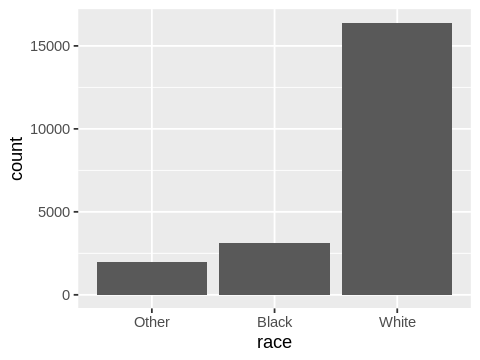

In [34]:
gss_cat %>% count(race)
ggplot(gss_cat, aes(race)) +
  geom_bar() 

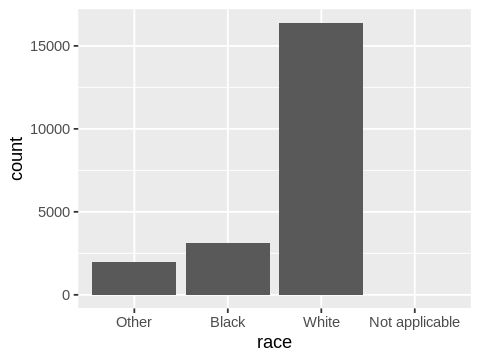

In [35]:
ggplot(gss_cat, aes(race)) +
  geom_bar() +
  scale_x_discrete(drop = FALSE)

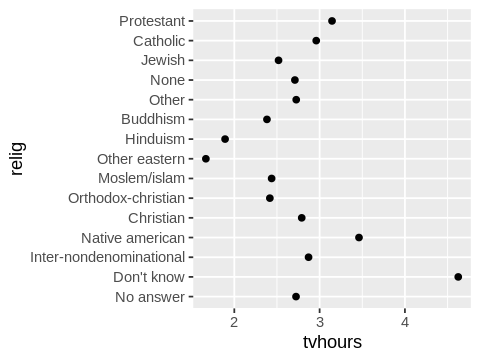

In [37]:
religion_summary = gss_cat %>% group_by(relig) %>%
                    summarise(age = mean(age, na.rm=TRUE),
                              tvhours = mean(tvhours, na.rm=TRUE),
                              n = n())
ggplot(religion_summary, aes(x=tvhours, y=relig)) + geom_point()

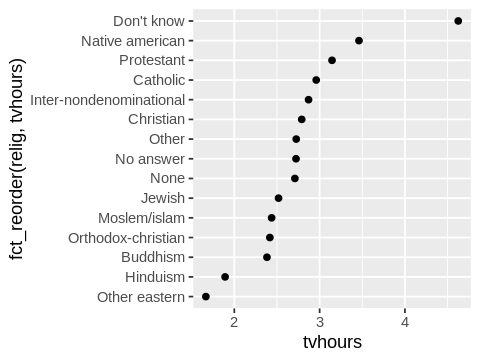

In [38]:
ggplot(religion_summary, aes(x=tvhours, y=fct_reorder(relig, tvhours))) + geom_point()

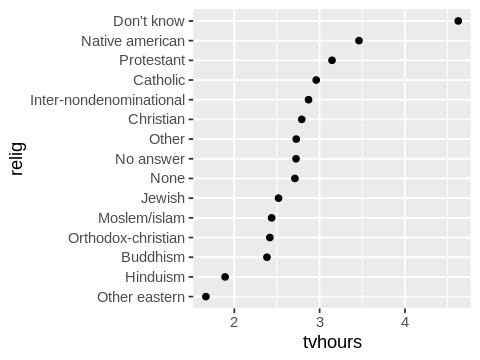

In [40]:
religion_summary %>%
  mutate(relig = fct_reorder(relig, tvhours)) %>%
  ggplot(aes(tvhours, relig)) +
    geom_point()

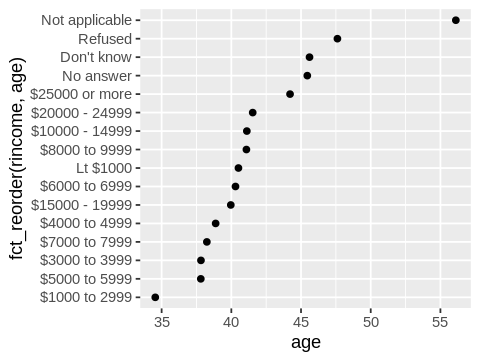

In [41]:
rincome_summary <- gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(rincome_summary, aes(age, fct_reorder(rincome, age))) + geom_point()

[1] "No answer"      "Don't know"     "Refused"        "$25000 or more"
 [5] "$20000 - 24999" "$15000 - 19999" "$10000 - 14999" "$8000 to 9999" 
 [9] "$7000 to 7999"  "$6000 to 6999"  "$5000 to 5999"  "$4000 to 4999" 
[13] "$3000 to 3999"  "$1000 to 2999"  "Lt $1000"       "Not applicable"

[1] "Not applicable" "No answer"      "Don't know"     "Refused"       
 [5] "$25000 or more" "$20000 - 24999" "$15000 - 19999" "$10000 - 14999"
 [9] "$8000 to 9999"  "$7000 to 7999"  "$6000 to 6999"  "$5000 to 5999" 
[13] "$4000 to 4999"  "$3000 to 3999"  "$1000 to 2999"  "Lt $1000"

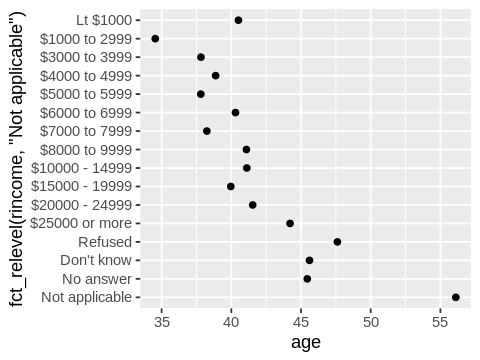

In [49]:
levels(rincome_summary$rincome)
rincome_relevel = fct_relevel(rincome_summary$rincome, 'Not applicable')
levels(rincome_relevel)

ggplot(rincome_summary, aes(age, fct_relevel(rincome, "Not applicable"))) +
  geom_point()

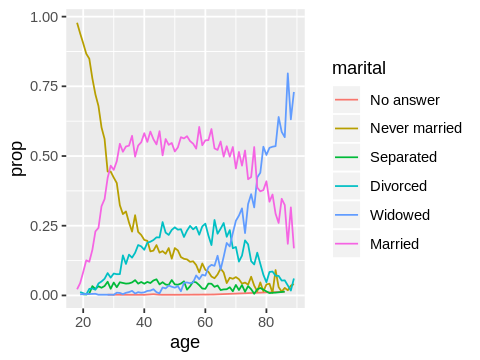

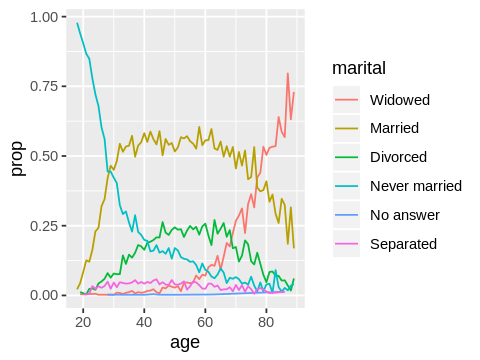

In [54]:
by_age <- gss_cat %>%
  filter(!is.na(age)) %>%
  count(age, marital) %>%
  group_by(age) %>%
  mutate(prop = n / sum(n))

ggplot(by_age, aes(age, prop, colour = marital)) +
  geom_line(na.rm = TRUE)

ggplot(by_age, aes(age, prop, colour = fct_reorder2(marital, age, prop))) +
  geom_line() +
  labs(colour = "marital")